In [1]:
import pandas as pd 
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [2]:
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(f"How much missing value in each column: {df.isna().sum()}")

How much missing value in each column: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Who were the passengers in the titanic 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('ticks')
plt.style.use('fivethirtyeight')

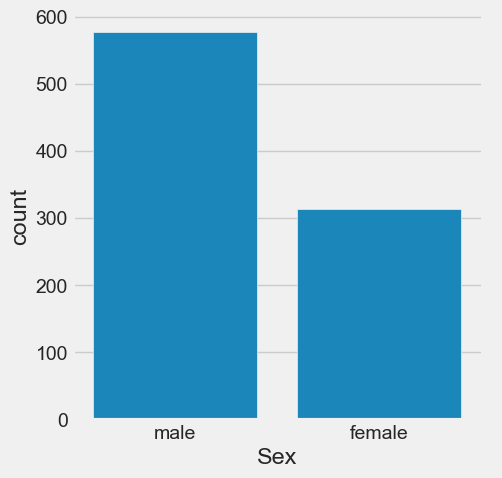

In [9]:
sns.catplot(x='Sex',kind='count',data=df)

C:\Users\Nitro\AppData\Local\Temp\ipykernel_7536\2670705671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Sex',kind='count',data=df,palette={'male':'red','female':'pink'})


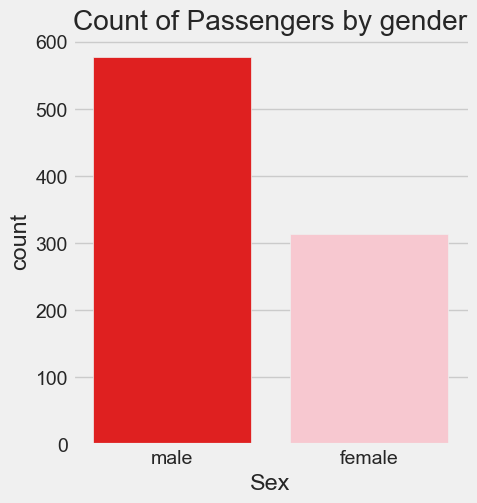

In [10]:
sns.catplot(x='Sex',kind='count',data=df,palette={'male':'red','female':'pink'})
plt.title("Count of Passengers by gender")
plt.show()

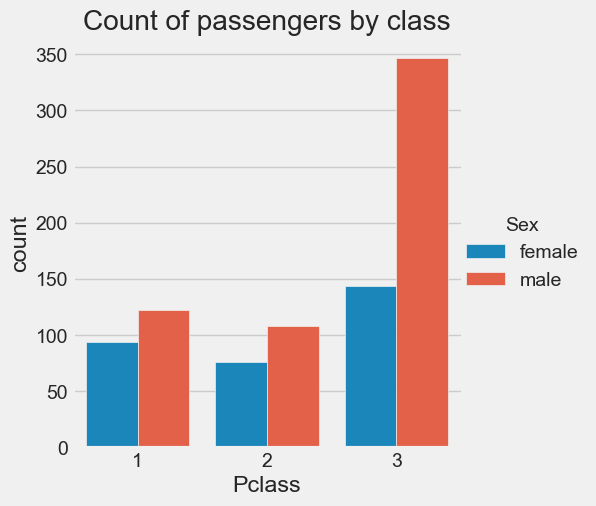

In [13]:
sns.catplot(x='Pclass',kind='count',data=df,hue='Sex')
plt.title("Count of passengers by class")
plt.show()

#### Create a new column 'Person' in which every person under 16 is child 

In [15]:
df['Person']=df.Sex
df.loc[df['Age']<16,'Person']='Child'
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male


In [16]:
df.Person.value_counts()

Person
male      537
female    271
Child      83
Name: count, dtype: int64

In [18]:
df.Person.unique()

array(['male', 'female', 'Child'], dtype=object)

In [19]:
df.Age.mean()

29.69911764705882

In [20]:
df.Age.max()

80.0

In [21]:
df.Age.min()

0.42

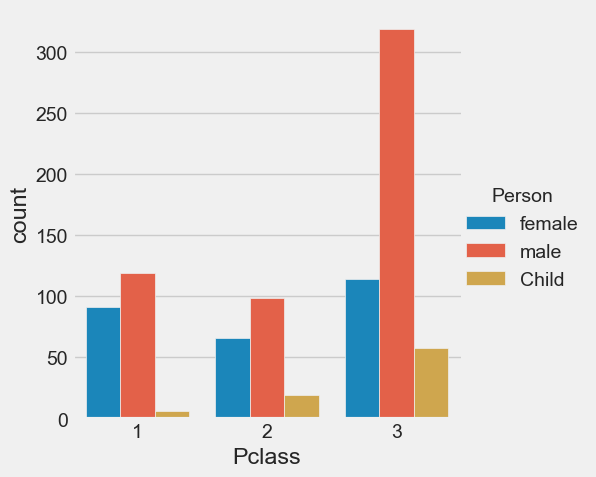

In [23]:
sns.catplot(x='Pclass',data=df,hue='Person',kind='count')

<Axes: >

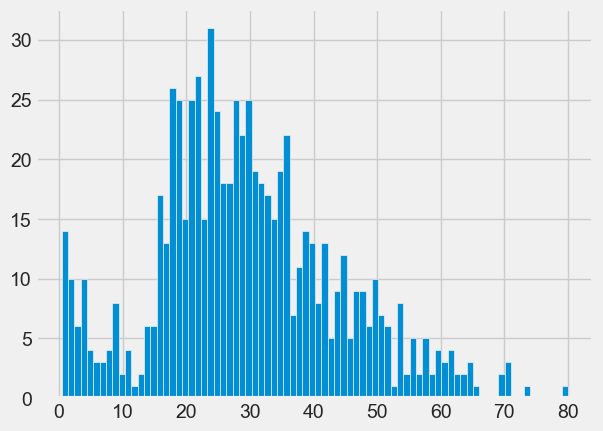

In [24]:
df.Age.hist(bins=80)

C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


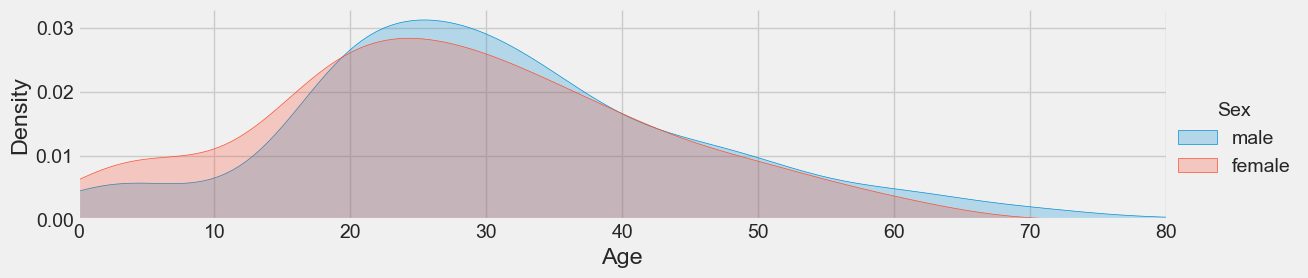

In [26]:
from ssl import OP_SINGLE_DH_USE
fif=sns.FacetGrid(df,hue='Sex',aspect=4)
fif.map(sns.kdeplot,'Age',shade=True)
oldest=df['Age'].max()
fif.set(xlim=(0,oldest))
fif.add_legend()
plt.show()
     

### What deck were the passengers on and how does that relate to their classs

In [29]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [30]:
deck=df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

C:\Users\Nitro\AppData\Local\Temp\ipykernel_7536\124432980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='pastel')


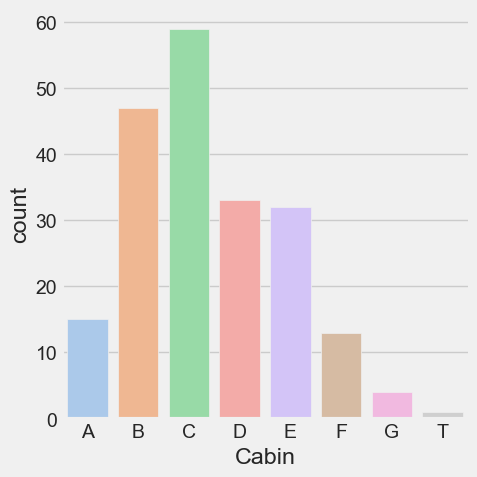

In [32]:
levels = []
for level in deck:
  levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='pastel')


C:\Users\Nitro\AppData\Local\Temp\ipykernel_7536\3864326956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='pastel')


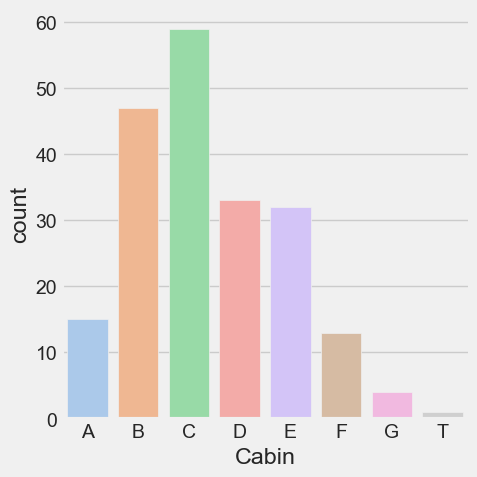

In [33]:

cabin_df
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='pastel')

C:\Users\Nitro\AppData\Local\Temp\ipykernel_7536\257281463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')


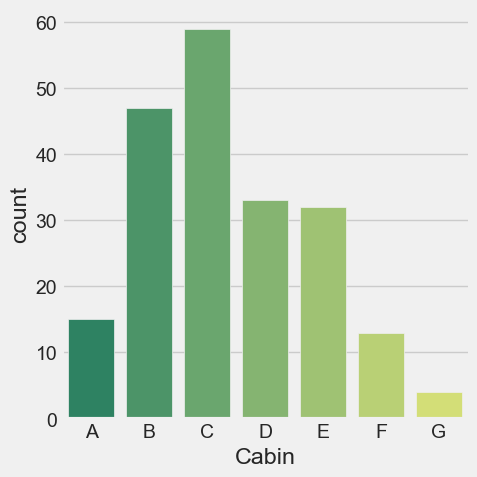

In [34]:

cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')
     


### Who was with family and who was alone ? 

In [36]:
df['Alone']=df.SibSp+df.Parch
df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [37]:
df['Alone'].value_counts()


Alone
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [39]:
df.loc[df['Alone']>0,'Alone']='With Family'
df.loc[df['Alone']==0,'Alone']='Alone'

SyntaxError: '[' was never closed (1245403988.py, line 2)